# Library

In [1]:
!pip install pmdarima

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:00


# Load Dataset

In [2]:
df = pd.read_csv("airline_passangers.csv", header = 0, index_col = 0, parse_dates = True)
df.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [3]:
# Merubah nama fitur
df.rename(columns={'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60': 'monthly totals in thousands'}, inplace=True)
df.head()

,monthly totals in thousands
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [4]:
# Melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 1949-01 to International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   monthly totals in thousands  144 non-null    float64
dtypes: float64(1)
memory usage: 2.3+ KB


In [5]:
df.tail()

,monthly totals in thousands
Month,
1960-09,508.0
1960-10,461.0
1960-11,390.0
1960-12,432.0
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60,NaN


In [6]:
# Menghapus baris terakhir
df = df.iloc[:-1]
df.tail()

,monthly totals in thousands
Month,
1960-08,606.0
1960-09,508.0
1960-10,461.0
1960-11,390.0
1960-12,432.0


<Axes: xlabel='Month'>

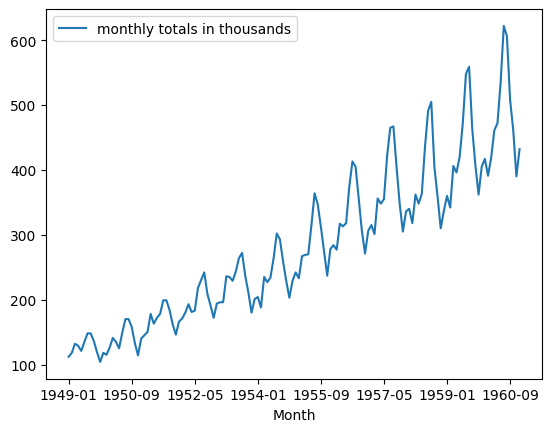

In [7]:
df.plot()

# Split Dataset

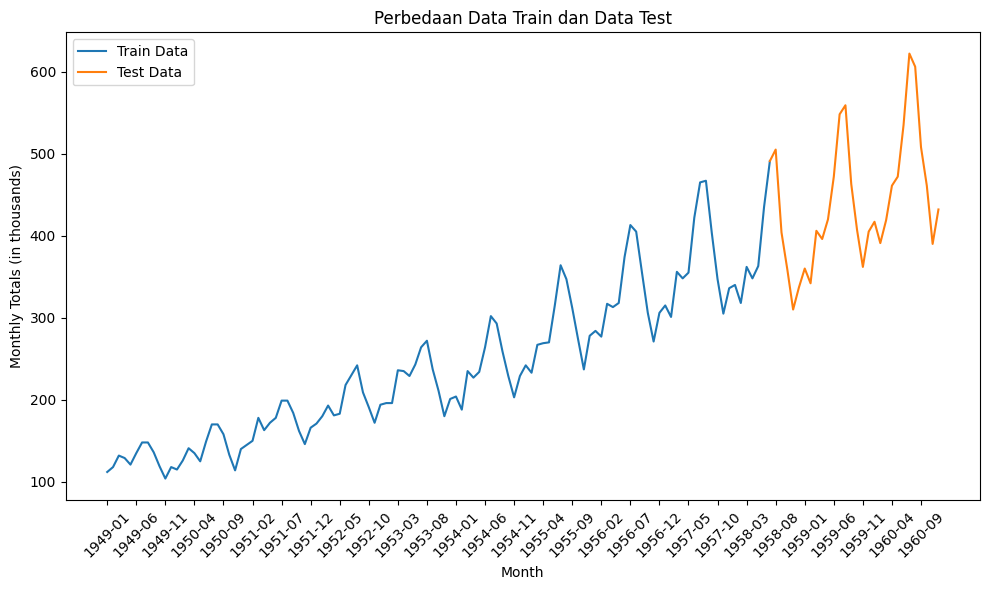

In [10]:
import matplotlib.pyplot as plt

# Pembagian dataset
train, test = df[:115], df[114:]
n = len(df)
n_train = len(train)
n_test = len(test)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df.index[:n_train], train['monthly totals in thousands'], label='Train Data')
plt.plot(df.index[n_train-1:], test['monthly totals in thousands'], label='Test Data')
plt.title('Perbedaan Data Train dan Data Test')
plt.xlabel('Month')
plt.ylabel('Monthly Totals (in thousands)')

# Set ticks every 5 months
plt.xticks(df.index[::5], rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


# Build Model

In [13]:
import pmdarima as pm

def arimamodel(timeseries):
  automodel = pm.auto_arima(timeseries,
                            start_p = 2,
                            start_q = 0,
                            test = "adf",
                            seasonal = True,
                            trace = True,
                            stepwise = False)
  return automodel

In [14]:
automodel = arimamodel(train)
print(automodel.summary())

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1367.727, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=1168.935, Time=0.37 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=1092.214, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=1078.074, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=1076.299, Time=0.43 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=1077.491, Time=0.63 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=1066.575, Time=1.26 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1083.134, Time=0.40 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=1073.718, Time=0.49 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=1074.541, Time=0.36 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=1076.487, Time=0.45 sec
 ARIMA(3,0,0)(0,0,0)[1] interc

# Forecasting

In [15]:
arima_prediction = automodel.predict(n_periods = test.shape[0])
arima_prediction

1958-08-01    497.391897
1958-09-01    467.856497
1958-10-01    434.474846
1958-11-01    412.590758
1958-12-01    411.947629
1959-01-01    411.307282
1959-02-01    410.669707
1959-03-01    410.034891
1959-04-01    409.402822
1959-05-01    408.773488
1959-06-01    408.146878
1959-07-01    407.522979
1959-08-01    406.901780
1959-09-01    406.283270
1959-10-01    405.667436
1959-11-01    405.054267
1959-12-01    404.443752
1960-01-01    403.835878
1960-02-01    403.230636
1960-03-01    402.628012
1960-04-01    402.027996
1960-05-01    401.430577
1960-06-01    400.835743
1960-07-01    400.243484
1960-08-01    399.653787
1960-09-01    399.066642
1960-10-01    398.482038
1960-11-01    397.899964
1960-12-01    397.320409
1961-01-01    396.743362
Freq: MS, dtype: float64

# Visualisasi Hasil Forecasting

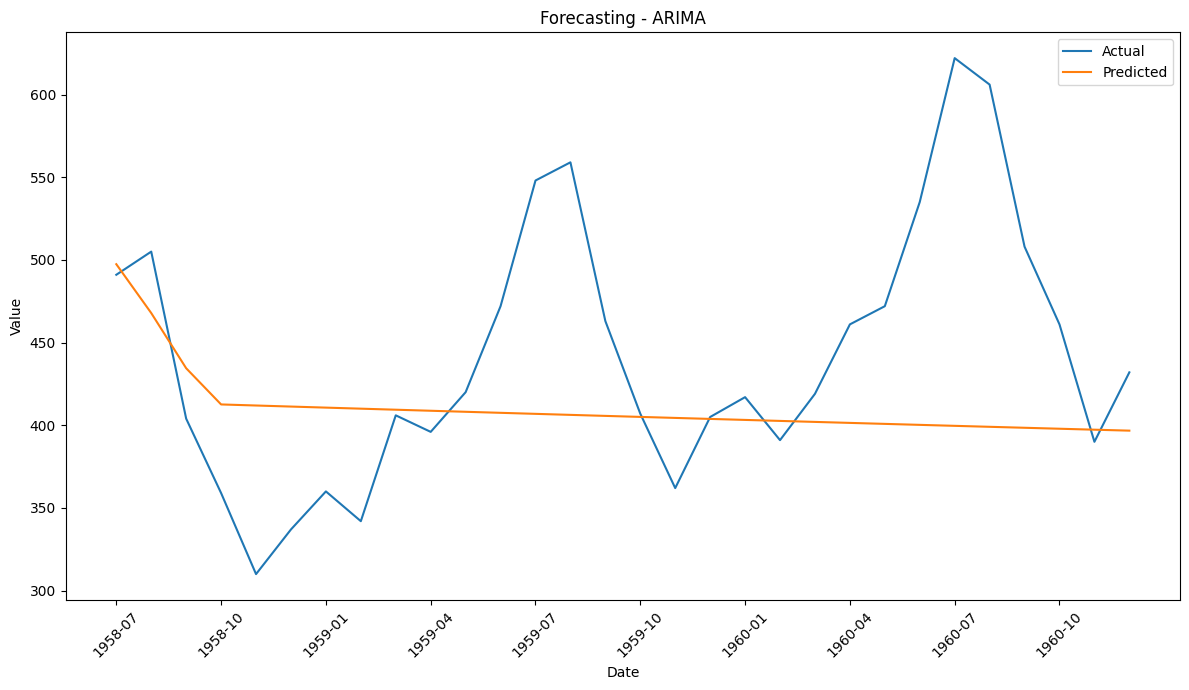

In [18]:
plt.figure(figsize=(12, 7))
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, arima_prediction, label="Predicted")
plt.title("Forecasting - ARIMA")
plt.xlabel("Date")
plt.ylabel("Value")

# Set ticks every 3 months
plt.xticks(test.index[::3], rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

# Evaluate

In [23]:
# Evaluasi hasil forecasting dengan RMSE

rmse = np.sqrt(mean_squared_error(test,arima_prediction))
print("Test RMSE: %3.f" % rmse)


Test RMSE:  85


# Improvement - More Trainning Data

## Split Datase

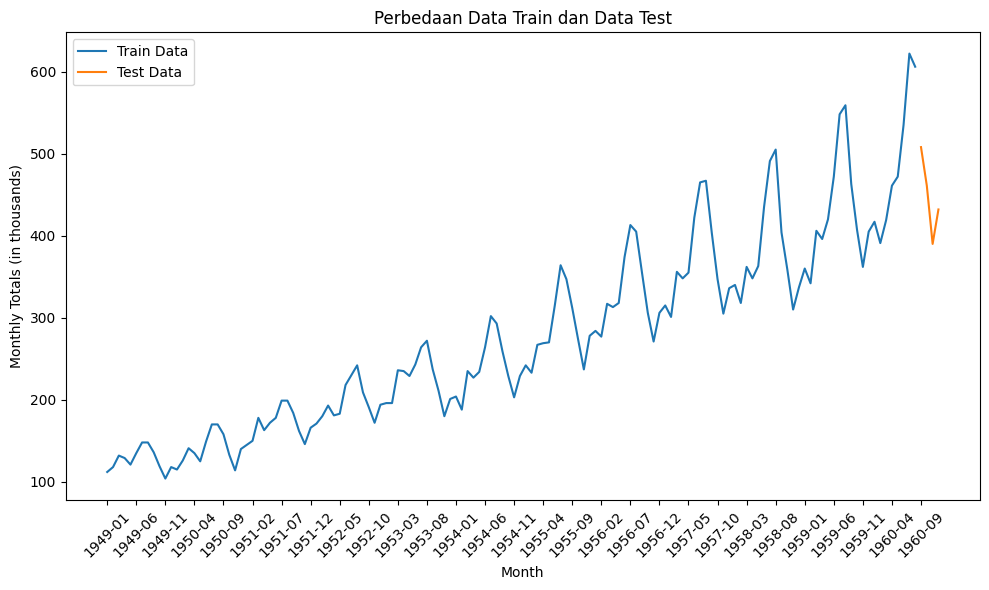

In [26]:
import matplotlib.pyplot as plt

# Pembagian dataset
train_2, test_2 = df[:140], df[140:]
n_2 = len(df)
n_train_2 = len(train_2)
n_test_2 = len(test_2)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df.index[:n_train_2], train_2['monthly totals in thousands'], label='Train Data')
plt.plot(df.index[n_train_2:], test_2['monthly totals in thousands'], label='Test Data')
plt.title('Perbedaan Data Train dan Data Test')
plt.xlabel('Month')
plt.ylabel('Monthly Totals (in thousands)')

# Set ticks every 5 months
plt.xticks(df.index[::5], rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


## Create Model

In [27]:
automodel = arimamodel(train_2)
print(automodel.summary())

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1736.080, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=1568.193, Time=0.26 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=1377.877, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=1360.503, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=1359.761, Time=0.25 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=1359.892, Time=0.47 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=1340.424, Time=0.48 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1364.799, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=1354.208, Time=0.27 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=1354.391, Time=0.40 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=1355.518, Time=0.65 sec
 ARIMA(3,0,0)(0,0,0)[1] interc

## Forecasting

In [28]:
arima_prediction_2 = automodel.predict(n_periods = test_2.shape[0])
arima_prediction_2

1960-09-01    575.068635
1960-10-01    525.285415
1960-11-01    492.800914
1960-12-01    496.965886
Freq: MS, dtype: float64

## Visualisasi

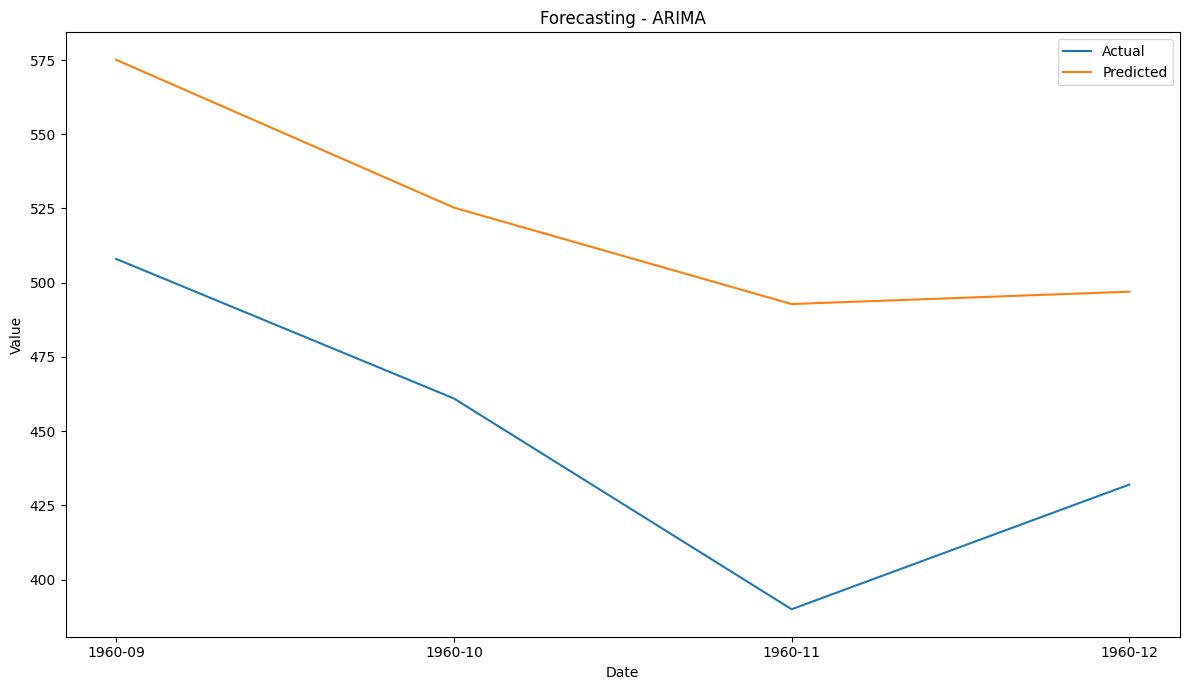

In [29]:
plt.figure(figsize=(12, 7))
plt.plot(test_2.index, test_2, label="Actual")
plt.plot(test_2.index, arima_prediction_2, label="Predicted")
plt.title("Forecasting - ARIMA")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

## Evaluate

In [30]:
# Evaluasi hasil forecasting dengan RMSE

rmse_2 = np.sqrt(mean_squared_error(test_2,arima_prediction_2))
print("Test RMSE: %3.f" % rmse_2)


Test RMSE:  77


# Upcoming Improvment


*   Rolling Forecast

*   Other methods: Manual ARIMA, Exponetial Smoothing (ES), Simple Exponential Smoothing
*   More Datasets



